# Project: Analysis of "WeRateDogs" Twitter Dataset

# Table of Contents


- [Introduction](#intro)
- [Data Wrangling](#wrangling)
    - [Gather](#gather)
    - [Assess](#assess) 
    - [Clean](#clean)
    - [Store](#store)
- [Exploratory Data Analysis](#eda)

<a id='intro'></a>
# 1. Introduction

> WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog [(Wikipedia)](https://en.wikipedia.org/wiki/WeRateDogs). While the primary purpose of this project is to demonstrate and practice "Data Wrangling" using data from the Twitter archive of WeRateDogs, a few units of energy is also spent on exploratory data analysis.  <br/>
<br/>
The Data. This project requires three datasets from different sources. The first being WeRateDogs Twitter archive which was downloaded manually and contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets, but not everything. Of the 5000+ tweets, Udacity filtered for tweets with ratings only (2356). Second, a tsv file downloaded programmatically from Udacity servers which contains predictions of images from WeRateDogs Twitter archive. And lastly, Twitter API. Additional data such as "retweet count" is gathered from the Twitter API. 
<br/>
<br/>
This project is intended to help get acquainted with the Data Wrangling process and some common libraries, modules and functions which are used to wrangle data. The process is summarized below
>- downloading files programmatically and manually from different sources by using request library, querying twitter API etc.
>- documenting all issues related to data quality or tidiness  
>- cleaning all issues and testing if they are resolved. Functions like "assert" or pandas inbuilt functions are used for this purpose.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os
import tweepy
import json
%matplotlib inline

<a id='wrangling'></a>

# 2. Data Wrangling

> Data Wrangling process can be lengthy. Hence, the process has been split into three stages for easier documentation and analysis:
>- **Gather:** All three datasets which are required to complete the project are imported into our workspace.
>- **Assess:** Here, we assess the quality and tidiness of our datasets by checking their completeness, validity, accuracy and consistency.
>- **Clean:** This step is further divided into three steps: **Define**, **Code** and **Test**. All data quality or tidiness issues, if any, are further documented, cleaned and tested

<a id='gather'></a>

## 2.1 Gather

In [2]:
# import the first dataset into our workspace
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [5]:
# download the second dataset, tweet image predictions
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(os.path.join('image-predictions.tsv'), 'wb') as file:
    file.write(response.content)

In [6]:
image_predictions = pd.read_csv('image-predictions.tsv', delimiter='\t')

In [7]:
# create an API object
consumer_key = 'vKNp***m06'
consumer_secret = 'eF***C49'
access_token = '14***Uho'
access_secret = '28po***09GD'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
# gather the necessary attributes and store them in a file
missing_tweets_id = []

for tweet_id in twitter_archive.tweet_id:
    try:
        tweet = api.get_status(tweet_id)
        with open(os.path.join('tweet_json.txt'), mode='a+') as file:
            dictionary = {
                    'tweet_id': tweet.id,
                    'retweet_count': tweet.retweet_count, 
                    'favorite_count': tweet.favorite_count,
                    'tweet_month': tweet.created_at.month,
                    'tweet_year': tweet.created_at.year
                         }
            json.dump(dictionary, file)
            file.write('\n')
            # print('successful', tweet_id)
    except Exception:
        missing_tweets_id.append(tweet_id) 
        # print('failed', tweet_id)

In [8]:
# read 'tweet_json.txt' into a pandas dataframe
additional_attributes = pd.read_json('tweet_json.txt', lines=True)

<a id='assess'></a>

## 2.2 Assess

**Note: Remove semicolon to show output** 

In [9]:
twitter_archive;

In [10]:
image_predictions;

In [11]:
additional_attributes;

In [12]:
sum(twitter_archive.tweet_id.duplicated())

0

In [13]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
sum(twitter_archive.in_reply_to_status_id.isnull())

2278

In [15]:
sum(twitter_archive.in_reply_to_user_id.isnull())

2278

In [16]:
sum(twitter_archive.retweeted_status_id.isnull())

2175

In [17]:
sum(twitter_archive.retweeted_status_user_id.isnull())

2175

In [18]:
sum(twitter_archive.retweeted_status_timestamp.isnull())

2175

In [19]:
twitter_archive.sample(10);

In [20]:
twitter_archive.name.unique();

In [21]:
twitter_archive.rating_numerator.unique();

In [22]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
additional_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
 3   tweet_month     2327 non-null   int64
 4   tweet_year      2327 non-null   int64
dtypes: int64(5)
memory usage: 91.0 KB


### 2.2.1 Quality issues

#### ```twitter_archive``` table
- enormous missing value in the following columns:   
```retweeted_status_id```, ```retweeted_status_user_id	```, ```retweeted_status_id```, ```name```  
```in_reply_to_user_id``` and ```in_reply_to_status_id``` (**can't clean**)      
- ```in_reply_to_status_id``` and ```in_reply_to_user_id``` datatype should be string not float
- incorrect dog names
- few tweets have been deleted
- retweets are included
- invalid ratings are present in the dataset
- some tweet ids do not have images

#### ```image_predictions.tsv``` table
- inconsistent dog-breed-name cases in ```p1```, ```p2``` and ```p3``` columns

#### ```tweet_json.txt``` table
- incomplete data (**can't clean**)

### 2.2.2 Tidiness issues
- ```additional_attributes``` should be part of ```twitter_archive``` table
- column headers are values, not variable names in ```twitter_archive``` table
- Year and Month duplicated in twitter_archive and tweet_json.txt tables
- multiple dog stages name in a single row e.g. ```tweet_id``` 733109485275860992 and few others

<a id='clean' ></a>
## 2.3 Clean

In [24]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
additional_attributes_clean = additional_attributes.copy()

In [25]:
twitter_archive_clean.name.unique();

## Quality issues

### 2.3.1 Missing and Incomplete Data

**```twitter_archive```**  

#### ***Define***

According to the project specification, we only want original ratings (no retweets) that have images. Thus, we do not need attributes related to retweets. We therefore drop the following columns: ```retweeted_status_id```, ```retweeted_status_user_id``` and ```retweeted_status_timestamp```.

#### ***Code***

In [26]:
twitter_archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### ***Test***

In [27]:
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### 2.3.2 Erroneous Datatype

**```twitter_archive```**  

#### ***Define***
Change ```in_reply_to_user_id``` and ```in_reply_to_status_id``` datatypes to string

#### ***Code***

In [28]:
twitter_archive_clean['in_reply_to_status_id'] = twitter_archive_clean.in_reply_to_status_id.astype(str)
twitter_archive_clean['in_reply_to_user_id'] = twitter_archive_clean.in_reply_to_user_id.astype(str)

In [29]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   tweet_id               2356 non-null   int64 
 1   in_reply_to_status_id  2356 non-null   object
 2   in_reply_to_user_id    2356 non-null   object
 3   timestamp              2356 non-null   object
 4   source                 2356 non-null   object
 5   text                   2356 non-null   object
 6   expanded_urls          2297 non-null   object
 7   rating_numerator       2356 non-null   int64 
 8   rating_denominator     2356 non-null   int64 
 9   name                   2356 non-null   object
 10  doggo                  2356 non-null   object
 11  floofer                2356 non-null   object
 12  pupper                 2356 non-null   object
 13  puppo                  2356 non-null   object
dtypes: int64(3), object(11)
memory usage: 257.8+ KB


### 2.3.3 Incorrect dog names

**```twitter_archive```**  

#### ***Define***
It's obvious that some dog names such as 'a', 'quite', 'not', 'one', 'an', 'very', 'my', 'actually', 'this', 'old', 'the', 'by', 'officially' etc. are not correct. This is probably because the data was extracted programmatically and all tweets text do not follow the same pattern (**'This is...'**). 
Furthermore, a special case to note is the dog named 'O'.

**Replace all invalid dog names with 'None'**

#### ***Code***

In [30]:
invalid_dog_names = [name for name in twitter_archive_clean.name.unique() if name.islower()]

In [31]:
invalid_dog_names;

In [32]:
# store all invalid dog names indices in a list
invalid_dog_names_index = []
for dog_name in invalid_dog_names:
    for index in twitter_archive_clean[twitter_archive_clean.name == dog_name].index:
        invalid_dog_names_index.append(index)

In [33]:
# replace all invalid dog names with 'None'
for index in invalid_dog_names_index:
    twitter_archive_clean.loc[index, 'name'] = None

In [34]:
# dog with the name 'O'
twitter_archive_clean.query('name == "O"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,nan,nan,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,https://twitter.com/dog_rates/status/776201521...,10,10,O,None,None,None,None


In [35]:
twitter_archive_clean.query('name == "O"').text.values[0] # actual name is O'Malley

"This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC"

In [36]:
# replace the dog's name with the correct one (O'Malley)
twitter_archive_clean.loc[775, 'name'] = "O'Malley"

#### ***Test***

In [37]:
[name for name in twitter_archive_clean.name.unique() if name != None and name.islower()]

[]

In [38]:
assert twitter_archive_clean.loc[775]['name'] != 'O' 

## Tidiness issues

### 2.3.4 Merge Dataframes

#### ***Define***

Merge ```twitter_archive``` and ```additional_attributes``` tables into a single dataframe 

#### ***Code***

In [39]:
twitter_archive_clean = pd.merge(twitter_archive_clean, additional_attributes_clean)

#### ***Test***

In [40]:
twitter_archive_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,tweet_month,tweet_year
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,7009,33812,8,2017
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,5302,29329,8,2017
2,891815181378084864,nan,nan,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,3481,22055,7,2017


## Quality issues

### 2.3.5 Deleted Tweets

**```twitter_archive```**  

#### ***Define***

When [gathering](#gather) the third dataset, some tweets probably have been deleted (stored in ```missing_tweets_id```). This tweets can be excluded from our analysis or visualization by deleting them.

#### ***Code***

**Note: When we merged the two dataframes above, this issue was automatically fixed**

### 2.3.6 Drop Retweets

**```twitter_archive```**  

#### ***Define***
According to the project specifications, retweets are not to be included. Hence, drop all retweets. 

#### ***Code***

In [41]:
retweets = twitter_archive_clean[twitter_archive_clean.text.str.startswith('RT')]
retweets;

In [42]:
twitter_archive_clean.drop(retweets.index, inplace=True)

#### ***Test***

In [43]:
twitter_archive_clean[twitter_archive_clean.text.str.startswith('RT')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,tweet_month,tweet_year


### 2.3.7 Just Few Invalid Ratings

**```twitter_archive```**  

**Note: Because there are probably a lot of invalid ratings, and cleaning all would require a lot of time, there is no 100 percent guarantee that all quality issues in these columns will be addressed after cleaning the issues below. Hence, I do not use these columns for analysis or visualization.**

- some dog ratings should be decimal numbers
- change the rating of the tweet with tweet_id 835246439529840640
- tweet with tweet_id 832088576586297345 should have no rating (**drop**)   

#### Decimal dog ratings

#### ***Define***
Change all tweets with decimal ratings to their corresponding valid ratings

#### ***Code***

In [44]:
# decimal ratings
decimal_ratings = twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator', 'rating_denominator']]
decimal_ratings;

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [45]:
# one of the decimal tweets
twitter_archive_clean.loc[44].text

'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948'

In [46]:
# replace corresponding tweets
decimal_ratings_ids = [i for i in decimal_ratings.index]
valid_ratings = [13.5, 9.75, 11.27, 9.5, 11.26]

for index, val in zip(decimal_ratings_ids, valid_ratings):
    twitter_archive_clean.loc[index, 'rating_numerator'] = val

#### ***Test***

In [47]:
twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
44,This is Bella. She hopes her smile made you sm...,13.50,10
675,"This is Logan, the Chow who lived. He solemnly...",9.75,10
742,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27,10
1661,I've been told there's a slight possibility he...,9.50,10
1684,Here we have uncovered an entire battalion of ...,11.26,10


#### **Invalid rating**

#### **Define**
change the rating of the tweet with tweet_id 835246439529840640

##### **Code**

In [48]:
twitter_archive_clean.query('tweet_id == 835246439529840640')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,tweet_month,tweet_year
297,835246439529840640,8.35245984028504e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,960.0,0,None,None,None,None,None,63,1992,2,2017


In [49]:
twitter_archive_clean.query('tweet_id == 835246439529840640').text.values[0]

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [50]:
twitter_archive_clean.loc[297, 'rating_numerator'] = 13
twitter_archive_clean.loc[297, 'rating_denominator'] = 10

#### ***Test***

In [51]:
twitter_archive_clean.query('tweet_id == 835246439529840640')[['tweet_id', 'rating_numerator', 'rating_denominator']]

,tweet_id,rating_numerator,rating_denominator
297,835246439529840640,13.0,10


#### Delete row with invalid rating

#### **Define**

drop tweet with tweet_id 832088576586297345

In [52]:
twitter_archive_clean.query('tweet_id == 832088576586297345')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,tweet_month,tweet_year
326,832088576586297345,8.320875475599974e+17,30582082.0,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,11.0,15,None,None,None,None,None,2,59,2,2017


In [53]:
twitter_archive_clean.query('tweet_id == 832088576586297345').text.values[0]

'@docmisterio account started on 11/15/15'

In [54]:
twitter_archive_clean.drop(326, inplace=True)

#### ***Test***

In [55]:
twitter_archive_clean.query('tweet_id == 832088576586297345')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,tweet_month,tweet_year


In [56]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2164 entries, 0 to 2326
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2164 non-null   int64  
 1   in_reply_to_status_id  2164 non-null   object 
 2   in_reply_to_user_id    2164 non-null   object 
 3   timestamp              2164 non-null   object 
 4   source                 2164 non-null   object 
 5   text                   2164 non-null   object 
 6   expanded_urls          2107 non-null   object 
 7   rating_numerator       2164 non-null   float64
 8   rating_denominator     2164 non-null   int64  
 9   name                   2060 non-null   object 
 10  doggo                  2164 non-null   object 
 11  floofer                2164 non-null   object 
 12  pupper                 2164 non-null   object 
 13  puppo                  2164 non-null   object 
 14  retweet_count          2164 non-null   int64  
 15  favo

### 2.3.8 Some tweet ids do not have images

**```tweet_archive```** 

#### ***Define***
Delete all tweets that do not have images. i.e. delete all rows with tweet ids which are not in ```image_predictions```

#### ***Code***

In [57]:
no_image = twitter_archive_clean[~twitter_archive_clean.tweet_id.isin(image_predictions_clean.tweet_id)]
no_image;

In [58]:
twitter_archive_clean.drop(no_image.index, inplace=True)

#### ***Test***

In [59]:
twitter_archive_clean[~twitter_archive_clean.tweet_id.isin(image_predictions_clean.tweet_id)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,tweet_month,tweet_year


### 2.3.9 Inconsistent dog breed name

**```image_prediction.tsv```** 

#### ***Define***
Change all dog breed names to lowercase to maintain consistency. More specifically, all cased characters have lower case.

#### ***Code***

In [60]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [61]:
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.lower()
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.lower()
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.lower()

#### ***Test***

In [62]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


## Tidiness

### 2.4.0 Duplicated year and month variable names

**```twitter_archive```** 

#### ***Define***
Drop ```timestamp``` column. This is because we already have ```tweet_month``` and ```tweet_year``` in our dataframe. Also, analysis is not performed based on exact time.

#### ***Code***

In [63]:
twitter_archive_clean.drop('timestamp', axis=1, inplace=True)

#### ***Test***

In [64]:
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'source',
       'text', 'expanded_urls', 'rating_numerator', 'rating_denominator',
       'name', 'doggo', 'floofer', 'pupper', 'puppo', 'retweet_count',
       'favorite_count', 'tweet_month', 'tweet_year'],
      dtype='object')

### 2.4.1 Reshape DataFrame

**```twitter_archive```** 

#### ***Define***


Reshape ```twitter_archive``` table such that values (```doggo```, ```floofer```, ```pupper``` and ```puppo```) are not column headers. Also, it is worth noting that some rows have more than one dog stages. This is because some tweets have more than one dog in a single image. An example is the tweet with id ```733109485275860992``` and [url](https://nitter.net/dog_rates/status/733109485275860992]). To fix this issue, store both data in the same column with comma as a delimiter

#### ***Code***

In [65]:
# one of tweets with multiple dog stages 
twitter_archive_clean.query('tweet_id == 733109485275860992')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,tweet_month,tweet_year
1085,733109485275860992,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",https://twitter.com/dog_rates/status/733109485...,12.0,10,None,doggo,None,pupper,None,15547,49404,5,2016


In [66]:
twitter_archive_clean.query('tweet_id == 733109485275860992').text.values[0]

'Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda'

In [69]:
# merge different dog types into a column dog_class
twitter_archive_clean['dog_class'] = twitter_archive_clean[['puppo', 'pupper', 'floofer', 'doggo']].apply(
    lambda x: ','.join(x.astype(str)),axis=1)
twitter_archive_clean['dog_class'] = twitter_archive_clean['dog_class'].str.replace(r'(None,)', repl='')
twitter_archive_clean.drop(['puppo','pupper','floofer','doggo'], axis=1, inplace=True)

#### ***Test***

In [70]:
twitter_archive_clean.query('tweet_id == 733109485275860992')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,tweet_month,tweet_year,dog_class
1085,733109485275860992,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",https://twitter.com/dog_rates/status/733109485...,12.0,10,None,15547,49404,5,2016,"pupper,doggo"


In [71]:
twitter_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,tweet_month,tweet_year,dog_class
1283,707021089608753152,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He's a Dasani Episcopalian. Go...,https://twitter.com/dog_rates/status/707021089...,12.0,10,Tucker,1227,3742,3,2016,None
2306,666287406224695296,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,1.0,2,None,57,123,11,2015,None
176,856526610513747968,8.55818117272019e+17,4196983835.0,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",https://twitter.com/dog_rates/status/856526610...,14.0,10,None,1654,10832,4,2017,None
1265,708026248782585858,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",Everybody stop what you're doing and watch thi...,https://twitter.com/dog_rates/status/708026248...,13.0,10,None,1754,4076,3,2016,None
1649,682059653698686977,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",This is Tess. Her main passions are shelves an...,https://twitter.com/dog_rates/status/682059653...,11.0,10,Tess,1532,4543,12,2015,None


<a id='store'></a>
## 2.4 Storing Data
Merge ```twitter_archive``` and ```image_prediction```. Finally, store the resulting dataframe in a file named ```twitter_archive_master.csv```

#### ***Code***

In [72]:
twitter_archive_master = twitter_archive_clean.merge(image_predictions_clean)

In [73]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

#### ***Test***

In [74]:
twitter_archive_master;

<a id='eda'></a>
# 3. Exploratory Data Analysis


### Q1: How does the number of retweets vary during the first few months? 

In [75]:
tweet_mean = twitter_archive_master.groupby(['tweet_year', 'tweet_month']).mean()[['retweet_count']]

In [76]:
tweet_count = twitter_archive_master.groupby(['tweet_year', 'tweet_month']).count()[['retweet_count']]

retweet_count
tweet_year tweet_month               
2015       11              441.550676
           12             1208.926027
2016       1              1217.106509
           2              1297.720721
           3              1317.191667

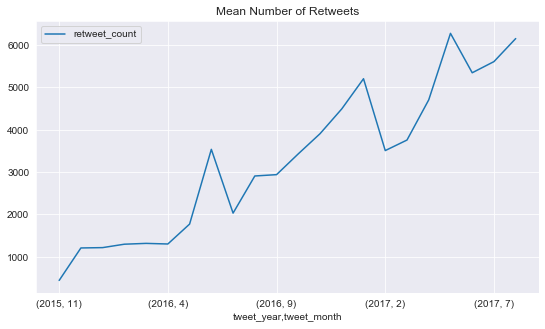

In [77]:
sns.set_style('darkgrid')
display(tweet_mean.head())
tweet_mean.plot(figsize=(9,5), title='Mean Number of Retweets');

retweet_count
tweet_year tweet_month               
2015       11                     296
           12                     365
2016       1                      169
           2                      111
           3                      120

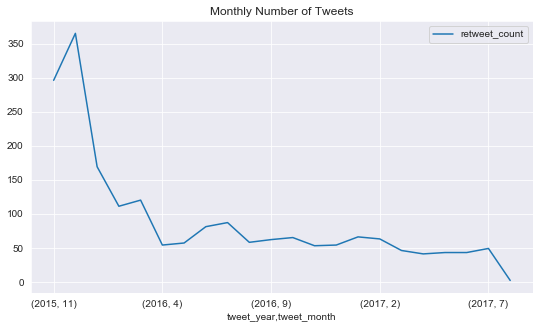

In [78]:
display(tweet_count.head())
tweet_count.plot(figsize=(9,5), title='Monthly Number of Tweets');

## Q2: How does the number of 'favorite count' vary during the first few months? 

In [79]:
favorite_mean = twitter_archive_master.groupby(['tweet_year', 'tweet_month']).mean()[['favorite_count']]

In [80]:
favorite_count = twitter_archive_master.groupby(['tweet_year', 'tweet_month']).count()[['favorite_count']]

favorite_count
tweet_year tweet_month                
2015       11              1088.263514
           12              3011.915068
2016       1               3406.260355
           2               3705.261261
           3               3907.641667

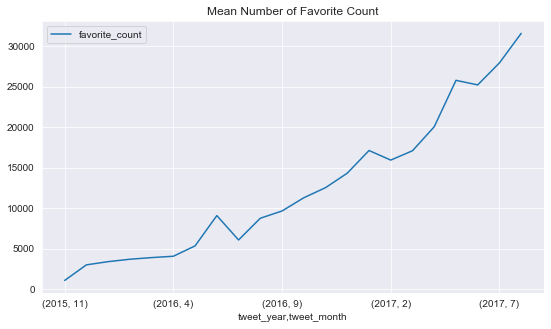

In [81]:
sns.set_style('darkgrid')
display(favorite_mean.head())
favorite_mean.plot(figsize=(9,5), title='Mean Number of Favorite Count');

In [82]:
twitter_archive_master.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'source',
       'text', 'expanded_urls', 'rating_numerator', 'rating_denominator',
       'name', 'retweet_count', 'favorite_count', 'tweet_month', 'tweet_year',
       'dog_class', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

### Q3: Can we find any pattern in tweets with high number of 'favorite count'?

In [83]:
top_liked_tweets = twitter_archive_master.sort_values(by='favorite_count', ascending = False).head(100)
with pd.option_context("display.max_columns", None):
    display(top_liked_tweets.head(10))

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,tweet_month,tweet_year,dog_class,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
768,744234799360020481,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13.0,10,None,70752,144907,6,2016,doggo,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True
305,822872901745569793,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13.0,10,None,39932,124132,1,2017,"puppo,None",https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,lakeland_terrier,0.196015,True,labrador_retriever,0.160329,True,irish_terrier,0.069126,True
396,807106840509214720,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13.0,10,Stephan,51690,111714,12,2016,None,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,chihuahua,0.505370,True,pomeranian,0.120358,True,toy_terrier,0.077008,True
107,866450705531457537,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,13.0,10,Jamesy,30213,108929,5,2017,"pupper,None",https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,2,french_bulldog,0.905334,True,boston_bull,0.078060,True,pug,0.001771,True
803,739238157791694849,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,13.0,10,None,52912,107268,6,2016,doggo,https://pbs.twimg.com/ext_tw_video_thumb/73923...,1,eskimo_dog,0.503372,True,siberian_husky,0.390413,True,malamute,0.080901,True
58,879415818425184262,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,13.0,10,Duddles,37459,92892,6,2017,None,https://pbs.twimg.com/ext_tw_video_thumb/87941...,1,english_springer,0.383404,True,boston_bull,0.134967,True,cardigan,0.110481,True
329,819004803107983360,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,https://twitter.com/dog_rates/status/819004803...,14.0,10,Bo,34550,82716,1,2017,doggo,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,tibetan_terrier,0.094759,True
134,859196978902773760,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,https://twitter.com/dog_rates/status/859196978...,12.0,10,None,26290,80604,5,2017,None,https://pbs.twimg.com/ext_tw_video_thumb/85919...,1,angora,0.224218,False,malamute,0.216163,True,persian_cat,0.128383,False
92,870374049280663552,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She really likes the planet. Wou...,https://twitter.com/dog_rates/status/870374049...,13.0,10,Zoey,22754,73972,6,2017,None,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,1,golden_retriever,0.841001,True,great_pyrenees,0.099278,True,labrador_retriever,0.032621,True
1416,678399652199309312,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",This made my day. 12/10 please enjoy https://t...,https://twitter.com/dog_rates/status/678399652...,12.0,10,None,28605,73527,12,2015,None,https://pbs.twimg.com/ext_tw_video_thumb/67839...,1,swing,0.929196,False,bedlington_terrier,0.015047,True,great_pyrenees,0.014039,True


In [84]:
top_liked_tweets.groupby('tweet_year').count()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_year,,,,,,,,,,,,,,,,,,,,,
2015,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
2016,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
2017,69,69,69,69,69,69,69,69,65,69,...,69,69,69,69,69,69,69,69,69,69
